<div align="right">
  Christopher Hyek<br>
  8/22/2019
</div>

<div align="center">
    <h1> Boat Identifier Project</h1>
</div>

# Abstract
Hello! Today I'm going to be putting together a Convolutional Neural Network that will help identify images of boats based on their type. 

The data set used was provided to me through Kaggle and is a fairly large file and pretty straight to the point on what the goal is.

With that in mind I plan to do the following things:

    1. Import proper libraries
    2. EDA
    3. Reshape the data for the CNN
    4. Try out different Keras features to improve the CNN
    5. Provide results based on this
    
The goals are pretty straight forward and as long as I make an extensive listing of each step along the way it should be easy to follow along.

# Index
[Directory and Importing Libraries](#Directory)
* Change Directory
* Libraries Used
* Loading CSV's

[EDA](#EDA)
* Relabeling Columns
* Bar Graph
* Doughnug Graph
* Null Value Check

[Sorting our Images](#Sorting_our_Images)
* Sorting Images by Train / Test
* Reshaping the Data for the Tests

[Testing_Begins](#Testing_Begins)
* Test 1
* Test 2
* Test 3
* Test 4
* Test 5

[Conclusion](#Conclusion)

# <u>Directory</u>

In [1]:
cd

C:\Users\Atlas


In [2]:
cd Module 4

C:\Users\Atlas\Module 4


In [3]:
%matplotlib inline
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, shutil
import seaborn as sns

from keras import layers, models, optimizers, regularizers
from keras.layers import Dropout
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

import warnings
warnings.simplefilter('ignore')

Using TensorFlow backend.


## Load_File

First thing we should do is go over our CSV files and consider what we are looking at. 

In [4]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [5]:
df_train.head()

,image,category
0,2823080.jpg,1
1,2870024.jpg,1
2,2662125.jpg,2
3,2900420.jpg,3
4,2804883.jpg,2


In [6]:
df_test.head()

,image
0,1007700.jpg
1,1011369.jpg
2,1051155.jpg
3,1062001.jpg
4,1069397.jpg


And here is where we run into our first problem. Since this dataset was obtained from Kaggle, the test set doesn't have the cattegory column within it to test our data properly because they wish for it to be a competition. So we'll instead do a train, test, split further down but to give us an idea of the total data we're looking at here are a few visualizations.


## Relabeling
Our data is numerically labeled so let's add a new column so we can visualize the data based on their real names.

In [7]:
# These boat titles were taken directly from the kaggle page that we had found the dataset from and we'll be using these
# names for the remaining of the notebook {'Cargo': 1, 'Military': 2, 'Carrier': 3, 'Cruise': 4, 'Tankers': 5} 

ship_name = {'Cargo': 1, 'Military': 2, 'Carrier': 3, 'Cruise': 4, 'Tanker': 5} 

In [8]:
ship_name = dict([[v,k] for k,v in ship_name.items()])

# Used to test it
# ship_name

In [9]:
df_train['ship'] = df_train['category'].map(ship_name).astype('category')

In [10]:
df_train.head()

,image,category,ship
0,2823080.jpg,1,Cargo
1,2870024.jpg,1,Cargo
2,2662125.jpg,2,Military
3,2900420.jpg,3,Carrier
4,2804883.jpg,2,Military


# EDA

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6252 entries, 0 to 6251
Data columns (total 3 columns):
image       6252 non-null object
category    6252 non-null int64
ship        6252 non-null category
dtypes: category(1), int64(1), object(1)
memory usage: 104.1+ KB


In [12]:
print('Number of unique boat types: ', df_train.category.nunique())
print(df_train['category'].value_counts(normalize=True))

Number of unique boat types:  5
1    0.339091
5    0.194658
2    0.186660
3    0.146513
4    0.133077
Name: category, dtype: float64


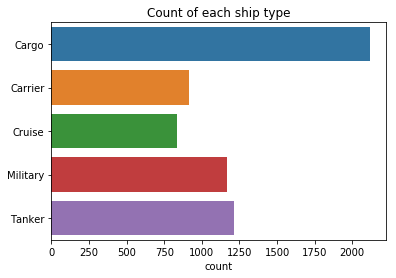

In [13]:
# display count of ship types
plt.title('Count of each ship type')
sns.countplot(y=df_train['ship'].values)
plt.show()

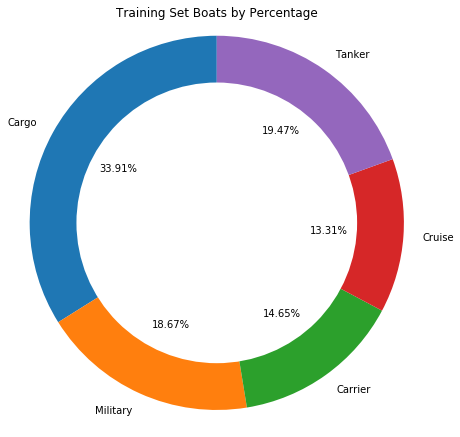

In [14]:
labels = ['Cargo', 'Military', 'Carrier', 'Cruise', 'Tanker']
sizes = [df_train['category'].value_counts()[1], df_train['category'].value_counts()[2], df_train['category'].value_counts()[3],
        df_train['category'].value_counts()[4], df_train['category'].value_counts()[5]]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.2f%%', startangle=90)
centre_circle = plt.Circle((0,0),0.750,fc='white')
fig = plt.gcf()
fig.set_size_inches(6, 6)
fig.gca().add_artist(centre_circle)

ax1.axis('equal')  
plt.tight_layout()
plt.title('Training Set Boats by Percentage')
plt.show()

## Checking for Null values

In [15]:
# Checking for Null / NaN values.

print('Null Value check: \n')
df_train.isnull().sum()

Null Value check: 



image       0
category    0
ship        0
dtype: int64

### Results of EDA
Despite the slight hiccup with needing to split our training data we seem to have a pretty clean EDA overall. No null/NaN values, we have a bit of an imbalance in data but we can work through that but let's get right to the CNN preparations.

# <u>Sorting_our_Images</u>
We now have created the "New_Directory" where we have a tain, validation, and test folder each with the five respective categories within it. Now that we have our data sorted we can begin to run our tests on the data.

In [16]:

# Do NOT RERUN MORE THAN THE FIRST TIME


# old_dir = 'images/'

# new_root_dir = 'images/New_Directory/'
# os.mkdir(new_root_dir)

# dir_names = ['train', 'test']
# for d in dir_names:
#     new_dir = os.path.join(new_root_dir, d)
#     os.mkdir(new_dir)
    
# for boat in df_train.ship.unique():
#     print('Moving {} pictures.'.format(boat))
#     for d in dir_names:
#         new_dir = os.path.join(new_root_dir, d, boat)
#         os.mkdir(new_dir)
#     temp = df_train[df_train.ship == boat]
#     train, test = np.split(temp.sample(frac=1), [int(.8*len(temp))])
#     print('Split {} imgs into {} train and {} test examples.'.format(len(temp), len(train), len(test)))
#     for i, temp in enumerate([train, test]):
#         for row in temp.index:
#             filename = temp['image'][row]
#             origin = os.path.join(old_dir + filename)
#             destination = os.path.join(new_root_dir + dir_names[i] + '/' + boat + '/' + filename)
#             shutil.copy(origin, destination)

## <u>Data_Reshaping</u>
Now that we have the photos split into a train and test group and amongst them each grouping of boat we can now begin to make the generators.

In [131]:
train_dir = 'images/New_Directory/train/'
test_dir = 'images/New_Directory/test/'

# I left the variables out so I can quickly change this information if needed
img_size = 75
batch_num = 10

# Used to rescale the images
# datagen = ImageDataGenerator(rescale=1./255)
# datagen = ImageDataGenerator(rotation_range=45,
#                              horizontal_flip = True, 
#                              width_shift_range=0.5, 
#                              height_shift_range=0.5,
#                              vertical_flip=False,
#                              brightness_range=[0.5, 1.5],
#                              zoom_range=[0.9, 1.25],
#                              shear_range=0.01,
#                              rescale=1./255)


datagen = ImageDataGenerator(rotation_range = 45, 
                            horizontal_flip = True, 
                            rescale = 1./255)

# Used to create the training and testing generated data
train_generator = datagen.flow_from_directory(
        train_dir,
        target_size=(img_size, img_size),
        batch_size= batch_num,
        class_mode='categorical')

test_generator = datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size= batch_num,
        class_mode='categorical')

Found 4999 images belonging to 5 classes.
Found 1253 images belonging to 5 classes.


In [132]:
# Used to make datasets out of the generated data

train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)


# Used to check taht the images were put into the data sets

# array_to_img(test_images[1])
# array_to_img(train_images[10])

In [133]:
A = [train_images, train_labels, test_images, test_labels]

print('Shapes of the Train and Test Data')
for i in A:
    print(np.shape(i))

Shapes of the Train and Test Data
(10, 75, 75, 3)
(10, 5)
(10, 75, 75, 3)
(10, 5)


In [134]:
train_img = train_images.reshape(train_images.shape[0], -1)
test_img = test_images.reshape(test_images.shape[0], -1)

In [135]:
print(train_img.shape)
print(test_img.shape)

(10, 16875)
(10, 16875)


In [136]:
train_y = np.reshape(train_labels[:,0], (10 ,1))
test_y = np.reshape(test_labels[:,0], (10 ,1))

In [137]:
train_img_unrow = train_images.reshape(train_images.shape[0], -1).T
test_img_unrow = test_images.reshape(test_images.shape[0], -1).T

In [138]:
print('This is the train data shape: ', np.shape(train_img_unrow), '\n')
print('This is the test data shape: ', np.shape(test_img_unrow))

This is the train data shape:  (16875, 10) 

This is the test data shape:  (16875, 10)


In [139]:
train_img_final = train_img_unrow/255
test_img_final = test_img_unrow/255

type(test_img_unrow)

numpy.ndarray

### Final Remarks
Now that the data is reshaped we can begin with our first test of the data.

# <u>Testing_Begins</u>
I have decided to run the data several times over while trying other methodologies out while I go. When doing this I will just show the changes above and have the results minimized in the Jupyter Notebook tabs.

## Pre-Test
This is a basic test I will run to see what comes of it before I start changing paramaters.

    - Two Convolution Layers
    - Two Pooling Layers
    - One Softmax activation
    - Compile with categorical crossentropy, RMSprop with a 0.0001, and Accuracy metric

In [87]:
original_start = datetime.datetime.now()
start = datetime.datetime.now()

model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(5, activation='softmax'))

In [88]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch= (4999/batch_num),
      epochs=50,
      validation_data=test_generator,
      validation_steps= (1253/batch_num))

Epoch 1/50
500/499 [==============================] - 35s 71ms/step - loss: 1.5284 - acc: 0.3368 - val_loss: 1.4716 - val_acc: 0.3328
Epoch 2/50
500/499 [==============================] - 40s 81ms/step - loss: 1.4072 - acc: 0.3992 - val_loss: 1.3168 - val_acc: 0.4661
Epoch 3/50
500/499 [==============================] - 42s 84ms/step - loss: 1.3191 - acc: 0.4505 - val_loss: 1.2725 - val_acc: 0.4796
Epoch 4/50
500/499 [==============================] - 42s 84ms/step - loss: 1.2531 - acc: 0.4885 - val_loss: 1.2159 - val_acc: 0.5028
Epoch 5/50
500/499 [==============================] - 42s 84ms/step - loss: 1.1875 - acc: 0.5213 - val_loss: 1.1399 - val_acc: 0.5451
Epoch 6/50
500/499 [==============================] - 46s 91ms/step - loss: 1.1572 - acc: 0.5229 - val_loss: 1.1270 - val_acc: 0.5443
Epoch 7/50
500/499 [==============================] - 40s 80ms/step - loss: 1.1381 - acc: 0.5348 - val_loss: 1.1251 - val_acc: 0.5650
Epoch 8/50
500/499 [==============================] - 39s 78ms

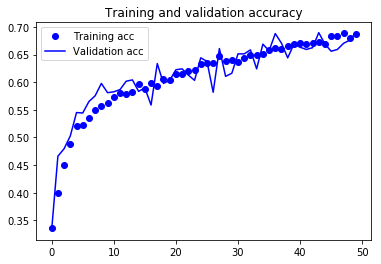

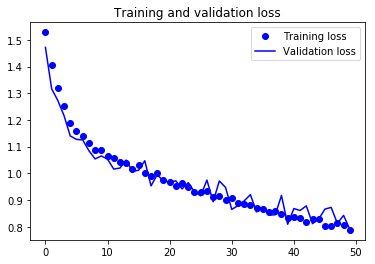

In [89]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [90]:
end = datetime.datetime.now()
elapsed = end - start
print('Training took a total of {}'.format(elapsed))

Training took a total of 0:33:03.485305


### Pre-Test Results:
Well considering that our test didn't seem to overfit and we could have gone further I think that our data augmentation and our vonvolutional layers and pooling are doing well. We ended up with test accuracy of 68% and about the same for the validation set. But before we increase the epochs and have it run for an even longer period of time, let's check out if another optimizer does better work for our model.


## Test 1
I think our pre-test did very well but we're going to check for a more useful optimizer before we continue with the larger tests. We'll go through SGD, RMSprop, Adagrad, Adadelta, Adam, Adamax, and Nadam below with only 10 epochs and everything else above remaining consistent.

We'll also clean up the code that we'll be repeating by creating functions for the model and the accuracy plots. As 

In [110]:
def basic_test1():
    history = model.fit_generator(
      train_generator,
      steps_per_epoch= (4999/batch_num),
      epochs=10,
      validation_data=test_generator,
      validation_steps= (1253/batch_num))

In [107]:
def accuracy_charts():
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.figure()
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()
    
    end = datetime.datetime.now()
    elapsed = end - start
    print('Training took a total of {}'.format(elapsed))

## Test 1.1 SGD

Epoch 1/10
500/499 [==============================] - 37s 75ms/step - loss: 0.9952 - acc: 0.6023 - val_loss: 0.9704 - val_acc: 0.6161
Epoch 2/10
500/499 [==============================] - 40s 79ms/step - loss: 0.9768 - acc: 0.6091 - val_loss: 0.9900 - val_acc: 0.6010
Epoch 3/10
500/499 [==============================] - 38s 77ms/step - loss: 1.0048 - acc: 0.5993 - val_loss: 0.9936 - val_acc: 0.6049
Epoch 4/10
500/499 [==============================] - 38s 77ms/step - loss: 0.9800 - acc: 0.6128 - val_loss: 0.9880 - val_acc: 0.6057
Epoch 5/10
500/499 [==============================] - 39s 77ms/step - loss: 0.9878 - acc: 0.6017 - val_loss: 1.0015 - val_acc: 0.6073
Epoch 6/10
500/499 [==============================] - 41s 83ms/step - loss: 0.9848 - acc: 0.6097 - val_loss: 0.9714 - val_acc: 0.6153
Epoch 7/10
500/499 [==============================] - 40s 80ms/step - loss: 0.9845 - acc: 0.6004 - val_loss: 0.9879 - val_acc: 0.6065
Epoch 8/10
500/499 [==============================] - 40s 80ms

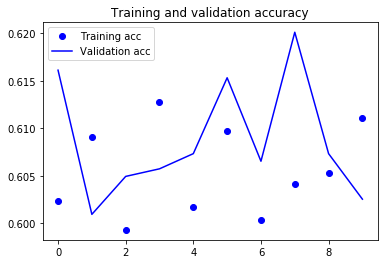

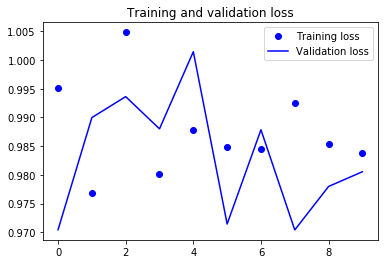

Training took a total of 0:18:07.677599


In [108]:
original_start = datetime.datetime.now()
start = datetime.datetime.now()

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch= (4999/batch_num),
      epochs=10,
      validation_data=test_generator,
      validation_steps= (1253/batch_num))

accuracy_charts()

### Test 1.1 SGD Results
Well they definitely have solid accuracy of 60% at 10 epochs but the loss is very high for both of them. Since this is the first one we have to work with at this few epochs we don't have a lot of comparison yet so after RMSprop is done we can start a tier list of optimiziers.

    -SGD: loss: 0.9837 - acc: 0.6112 - val_loss: 0.9806 - val_acc: 0.6026

## Test 1.2 RMSprop

Epoch 1/10
500/499 [==============================] - 41s 82ms/step - loss: 1.0065 - acc: 0.5945 - val_loss: 0.9840 - val_acc: 0.6073
Epoch 2/10
500/499 [==============================] - 38s 76ms/step - loss: 0.9874 - acc: 0.6071 - val_loss: 0.9781 - val_acc: 0.6201
Epoch 3/10
500/499 [==============================] - 37s 74ms/step - loss: 0.9839 - acc: 0.6023 - val_loss: 1.0467 - val_acc: 0.5826
Epoch 4/10
500/499 [==============================] - 39s 78ms/step - loss: 0.9802 - acc: 0.6022 - val_loss: 0.9683 - val_acc: 0.6073
Epoch 5/10
500/499 [==============================] - 42s 83ms/step - loss: 0.9653 - acc: 0.6170 - val_loss: 0.9725 - val_acc: 0.6249
Epoch 6/10
500/499 [==============================] - 41s 82ms/step - loss: 0.9526 - acc: 0.6207 - val_loss: 0.9523 - val_acc: 0.6233
Epoch 7/10
500/499 [==============================] - 41s 81ms/step - loss: 0.9467 - acc: 0.6233 - val_loss: 0.9390 - val_acc: 0.6273
Epoch 8/10
500/499 [==============================] - 42s 85ms

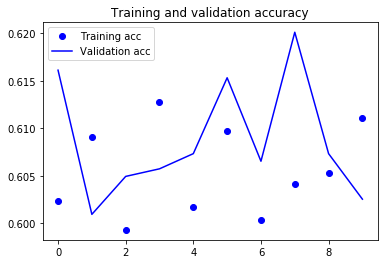

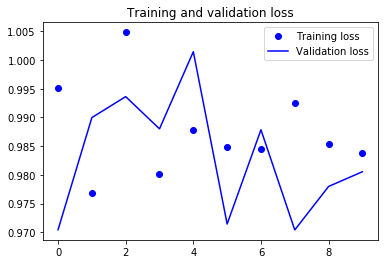

Training took a total of 0:25:26.191345


In [111]:
original_start = datetime.datetime.now()
start = datetime.datetime.now()

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])
basic_test1()

accuracy_charts()

### Test 1.2 RMSprop Results
So far RMSprop outperforms SGD in every metric that we is listed in the model so that is the one we'll be using so far for Test 2.

    - RMS: loss: 0.9241 - acc: 0.6400 - val_loss: 0.9477 - val_acc: 0.6353
    - SGD: loss: 0.9837 - acc: 0.6112 - val_loss: 0.9806 - val_acc: 0.6026 
    

## Test 1.3 Adagrad

Epoch 1/10
500/499 [==============================] - 46s 91ms/step - loss: 0.8714 - acc: 0.6629 - val_loss: 0.8989 - val_acc: 0.6528
Epoch 2/10
500/499 [==============================] - 47s 94ms/step - loss: 0.8923 - acc: 0.6519 - val_loss: 0.9009 - val_acc: 0.6409
Epoch 3/10
500/499 [==============================] - 39s 78ms/step - loss: 0.8721 - acc: 0.6668 - val_loss: 0.8760 - val_acc: 0.6504
Epoch 4/10
500/499 [==============================] - 44s 89ms/step - loss: 0.8783 - acc: 0.6583 - val_loss: 0.8846 - val_acc: 0.6449
Epoch 5/10
500/499 [==============================] - 46s 92ms/step - loss: 0.8768 - acc: 0.6642 - val_loss: 0.9110 - val_acc: 0.6361
Epoch 6/10
500/499 [==============================] - 41s 82ms/step - loss: 0.8818 - acc: 0.6589 - val_loss: 0.8843 - val_acc: 0.6512
Epoch 7/10
500/499 [==============================] - 42s 84ms/step - loss: 0.8789 - acc: 0.6567 - val_loss: 0.8707 - val_acc: 0.6441
Epoch 8/10
500/499 [==============================] - 39s 78ms

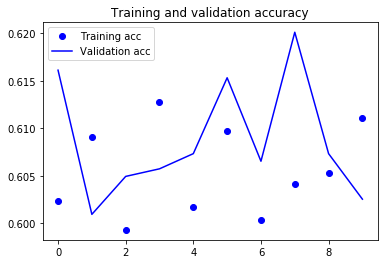

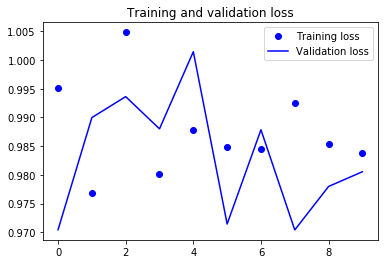

Training took a total of 0:32:37.541150


In [112]:
original_start = datetime.datetime.now()
start = datetime.datetime.now()

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adagrad(lr=1e-4),
              metrics=['acc'])
basic_test1()

accuracy_charts()

### Test 1.3 Adagrad Results
First and foremost it seems that my intial start time function kept compounding so from this point onward it will show proper run times.

Slightly better results that RMSprop in every category but only marginally. So Adagrad and RMSprop are the two most likely optimizers that I will use later for more testing.

    - Adagrad: loss: 0.8839 - acc: 0.6561 - val_loss: 0.8881 - val_acc: 0.6504
    - RMS: loss: 0.9241 - acc: 0.6400 - val_loss: 0.9477 - val_acc: 0.6353
    - SGD: loss: 0.9837 - acc: 0.6112 - val_loss: 0.9806 - val_acc: 0.6026 

## Test 1.4 Adadelta

Epoch 1/10
500/499 [==============================] - 37s 74ms/step - loss: 0.8739 - acc: 0.6553 - val_loss: 0.8800 - val_acc: 0.6592
Epoch 2/10
500/499 [==============================] - 39s 79ms/step - loss: 0.8745 - acc: 0.6637 - val_loss: 0.8796 - val_acc: 0.6441
Epoch 3/10
500/499 [==============================] - 40s 79ms/step - loss: 0.8802 - acc: 0.6575 - val_loss: 0.8868 - val_acc: 0.6433
Epoch 4/10
500/499 [==============================] - 40s 79ms/step - loss: 0.8760 - acc: 0.6607 - val_loss: 0.8857 - val_acc: 0.6441
Epoch 5/10
500/499 [==============================] - 40s 81ms/step - loss: 0.8704 - acc: 0.6633 - val_loss: 0.8962 - val_acc: 0.6457
Epoch 6/10
500/499 [==============================] - 40s 81ms/step - loss: 0.8724 - acc: 0.6631 - val_loss: 0.9022 - val_acc: 0.6417
Epoch 7/10
500/499 [==============================] - 40s 81ms/step - loss: 0.8776 - acc: 0.6549 - val_loss: 0.8935 - val_acc: 0.6488
Epoch 8/10
500/499 [==============================] - 41s 81ms

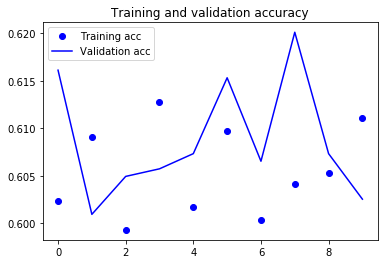

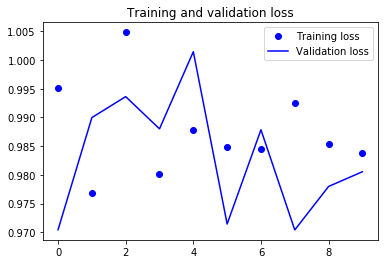

Training took a total of 0:06:39.225974


In [114]:
original_start = datetime.datetime.now()
start = datetime.datetime.now()

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adadelta(lr=1e-4),
              metrics=['acc'])
basic_test1()

accuracy_charts()

### Test 1.4 Adadelta Results
Adadelta and Adagrad are both very close to each other in performance with Adadelta just barely doing better.

    - Adadelta: loss: 0.8764 - acc: 0.6564 - val_loss: 0.8855 - val_acc: 0.6480
    - Adagrad: loss: 0.8839 - acc: 0.6561 - val_loss: 0.8881 - val_acc: 0.6504
    - RMS: loss: 0.9241 - acc: 0.6400 - val_loss: 0.9477 - val_acc: 0.6353
    - SGD: loss: 0.9837 - acc: 0.6112 - val_loss: 0.9806 - val_acc: 0.6026 

## Test 1.5 Adam

Epoch 1/10
500/499 [==============================] - 40s 81ms/step - loss: 0.9117 - acc: 0.6434 - val_loss: 0.9006 - val_acc: 0.6393
Epoch 2/10
500/499 [==============================] - 40s 80ms/step - loss: 0.8913 - acc: 0.6547 - val_loss: 0.8820 - val_acc: 0.6584
Epoch 3/10
500/499 [==============================] - 40s 80ms/step - loss: 0.8854 - acc: 0.6510 - val_loss: 0.8963 - val_acc: 0.6393
Epoch 4/10
500/499 [==============================] - 40s 81ms/step - loss: 0.8812 - acc: 0.6575 - val_loss: 0.9057 - val_acc: 0.6401
Epoch 5/10
500/499 [==============================] - 40s 80ms/step - loss: 0.8663 - acc: 0.6589 - val_loss: 0.8667 - val_acc: 0.6504
Epoch 6/10
500/499 [==============================] - 40s 80ms/step - loss: 0.8698 - acc: 0.6549 - val_loss: 0.8730 - val_acc: 0.6528
Epoch 7/10
500/499 [==============================] - 40s 80ms/step - loss: 0.8569 - acc: 0.6649 - val_loss: 0.8426 - val_acc: 0.6616
Epoch 8/10
500/499 [==============================] - 40s 81ms

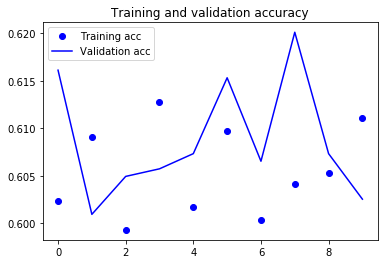

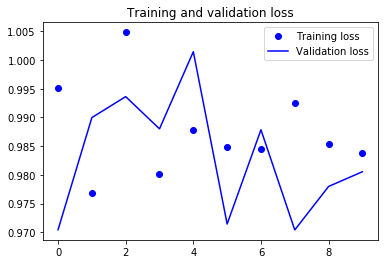

Training took a total of 0:06:42.271030


In [115]:
original_start = datetime.datetime.now()
start = datetime.datetime.now()

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=1e-4),
              metrics=['acc'])
basic_test1()

accuracy_charts()

### Test 1.5 Adam Results
Adam is now the best suited for the model. While it is unintentional in the order it seems that we so far have each progressive test doing better than the last.

    - Adam: loss: 0.8369 - acc: 0.6723 - val_loss: 0.8451 - val_acc: 0.6496
    - Adadelta: loss: 0.8764 - acc: 0.6564 - val_loss: 0.8855 - val_acc: 0.6480
    - Adagrad: loss: 0.8839 - acc: 0.6561 - val_loss: 0.8881 - val_acc: 0.6504
    - RMS: loss: 0.9241 - acc: 0.6400 - val_loss: 0.9477 - val_acc: 0.6353
    - SGD: loss: 0.9837 - acc: 0.6112 - val_loss: 0.9806 - val_acc: 0.6026 

## Test 1.6 Adamax

Epoch 1/10
500/499 [==============================] - 40s 81ms/step - loss: 0.8107 - acc: 0.6844 - val_loss: 0.8296 - val_acc: 0.6776
Epoch 2/10
500/499 [==============================] - 40s 80ms/step - loss: 0.8099 - acc: 0.6856 - val_loss: 0.8211 - val_acc: 0.6784
Epoch 3/10
500/499 [==============================] - 40s 80ms/step - loss: 0.8064 - acc: 0.6835 - val_loss: 0.8481 - val_acc: 0.6632
Epoch 4/10
500/499 [==============================] - 41s 82ms/step - loss: 0.8025 - acc: 0.6930 - val_loss: 0.8284 - val_acc: 0.6736
Epoch 5/10
500/499 [==============================] - 40s 80ms/step - loss: 0.8096 - acc: 0.6848 - val_loss: 0.8137 - val_acc: 0.6832
Epoch 6/10
500/499 [==============================] - 40s 80ms/step - loss: 0.7989 - acc: 0.6909 - val_loss: 0.8272 - val_acc: 0.6712
Epoch 7/10
500/499 [==============================] - 40s 80ms/step - loss: 0.7996 - acc: 0.6879 - val_loss: 0.8377 - val_acc: 0.6744
Epoch 8/10
500/499 [==============================] - 40s 81ms

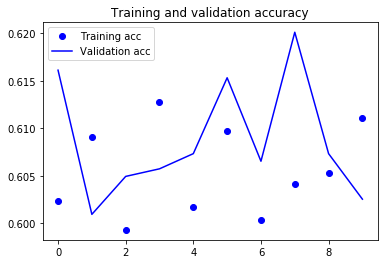

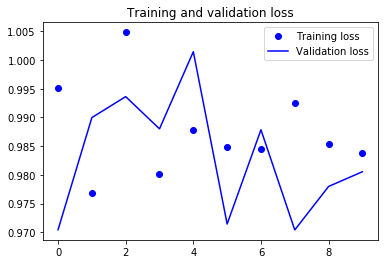

Training took a total of 0:06:43.439014


In [116]:
soriginal_start = datetime.datetime.now()
start = datetime.datetime.now()

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adamax(lr=1e-4),
              metrics=['acc'])
basic_test1()

accuracy_charts()

### Test 1.6 Adamax Results
Adamax now just barely does bettr than Adam.

    - Adamax: loss: 0.7954 - acc: 0.6895 - val_loss: 0.8336 - val_acc: 0.6760
    - Adam: loss: 0.8369 - acc: 0.6723 - val_loss: 0.8451 - val_acc: 0.6496
    - Adadelta: loss: 0.8764 - acc: 0.6564 - val_loss: 0.8855 - val_acc: 0.6480
    - Adagrad: loss: 0.8839 - acc: 0.6561 - val_loss: 0.8881 - val_acc: 0.6504
    - RMS: loss: 0.9241 - acc: 0.6400 - val_loss: 0.9477 - val_acc: 0.6353
    - SGD: loss: 0.9837 - acc: 0.6112 - val_loss: 0.9806 - val_acc: 0.6026 


## Test 1.7 Nadam

Epoch 1/10
500/499 [==============================] - 41s 81ms/step - loss: 0.8116 - acc: 0.6828 - val_loss: 0.8337 - val_acc: 0.6688
Epoch 2/10
500/499 [==============================] - 37s 74ms/step - loss: 0.8138 - acc: 0.6796 - val_loss: 0.8391 - val_acc: 0.6688
Epoch 3/10
500/499 [==============================] - 37s 74ms/step - loss: 0.8051 - acc: 0.6834 - val_loss: 0.8151 - val_acc: 0.6864
Epoch 4/10
500/499 [==============================] - 39s 77ms/step - loss: 0.7979 - acc: 0.6863 - val_loss: 0.8235 - val_acc: 0.6640
Epoch 5/10
500/499 [==============================] - 38s 76ms/step - loss: 0.7923 - acc: 0.6882 - val_loss: 0.7992 - val_acc: 0.6983
Epoch 6/10
500/499 [==============================] - 37s 75ms/step - loss: 0.7836 - acc: 0.6956 - val_loss: 0.8093 - val_acc: 0.6983
Epoch 7/10
500/499 [==============================] - 37s 74ms/step - loss: 0.7759 - acc: 0.6946 - val_loss: 0.8483 - val_acc: 0.6688
Epoch 8/10
500/499 [==============================] - 37s 75ms

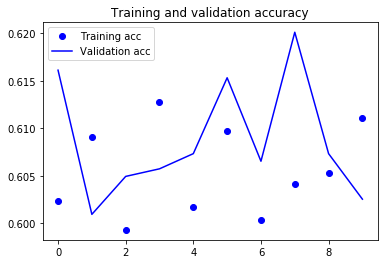

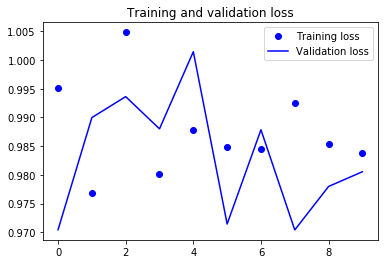

Training took a total of 0:06:18.636000


In [117]:
original_start = datetime.datetime.now()
start = datetime.datetime.now()

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Nadam(lr=1e-4),
              metrics=['acc'])
basic_test1()

accuracy_charts()

# Test 1 Results
It seems that our model testing will be using Nadam, Adamax, and Adam for optimizers for our future tests. Now that we have the optimizier question sorted out, let's aim for hidden layers.

    - Nadam: loss: 0.7633 - acc: 0.7027 - val_loss: 0.8049 - val_acc: 0.6784
    - Adamax: loss: 0.7954 - acc: 0.6895 - val_loss: 0.8336 - val_acc: 0.6760
    - Adam: loss: 0.8369 - acc: 0.6723 - val_loss: 0.8451 - val_acc: 0.6496
    - Adadelta: loss: 0.8764 - acc: 0.6564 - val_loss: 0.8855 - val_acc: 0.6480
    - Adagrad: loss: 0.8839 - acc: 0.6561 - val_loss: 0.8881 - val_acc: 0.6504
    - RMS: loss: 0.9241 - acc: 0.6400 - val_loss: 0.9477 - val_acc: 0.6353
    - SGD: loss: 0.9837 - acc: 0.6112 - val_loss: 0.9806 - val_acc: 0.6026 
    
    
# Test 2 Layer Testing
We'll use Nadam for Test 2 and at the end we'll compare to Adam again. But the primary changes that we'll try with Test 2 is to add more hidden layers and see how they fair. We kept everything the same from Test 1 except used 20 Epochs and went to Nadam.

Changelist:

    - 20 Epochs
    
### Test 2.1 
    - One dense layers added

In [154]:
original_start = datetime.datetime.now()
start = datetime.datetime.now()

model = models.Sequential()

model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu', input_shape=(16875,)))

model.add(layers.Dense(5, activation='softmax'))

In [155]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Nadam(lr=1e-4),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch= (4999/batch_num),
      epochs=20,
      validation_data=test_generator,
      validation_steps= (1253/batch_num))

Epoch 1/20
500/499 [==============================] - 44s 87ms/step - loss: 1.4766 - acc: 0.3578 - val_loss: 1.3389 - val_acc: 0.4326
Epoch 2/20
500/499 [==============================] - 47s 94ms/step - loss: 1.2529 - acc: 0.4809 - val_loss: 1.1838 - val_acc: 0.5315
Epoch 3/20
500/499 [==============================] - 47s 94ms/step - loss: 1.1868 - acc: 0.5041 - val_loss: 1.1223 - val_acc: 0.5339
Epoch 4/20
500/499 [==============================] - 45s 89ms/step - loss: 1.0867 - acc: 0.5567 - val_loss: 1.0814 - val_acc: 0.5547
Epoch 5/20
500/499 [==============================] - 45s 91ms/step - loss: 1.0798 - acc: 0.5605 - val_loss: 1.0495 - val_acc: 0.5555
Epoch 6/20
500/499 [==============================] - 45s 91ms/step - loss: 1.0504 - acc: 0.5693 - val_loss: 1.0150 - val_acc: 0.5754
Epoch 7/20
500/499 [==============================] - 46s 91ms/step - loss: 1.0221 - acc: 0.5818 - val_loss: 1.0018 - val_acc: 0.5970
Epoch 8/20
500/499 [==============================] - 46s 91ms

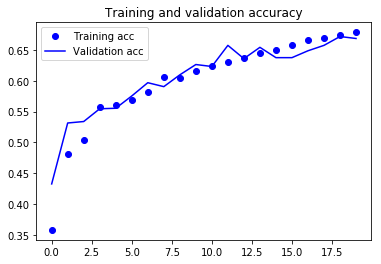

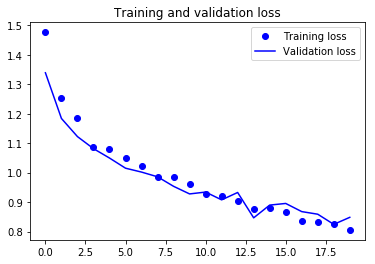

Training took a total of 0:15:16.470737


In [156]:
accuracy_charts()

### Test 2.1 Results
The single layer test seems to do well but we'll need to wait to see what it compares to with 2.2. On it's own it is still doing far better than the pre-test.

    - 1 Layer: loss: 0.8054 - acc: 0.6790 - val_loss: 0.8482 - val_acc: 0.6688


## Test 2.2 Two layers Ascending
We'll now test with two layers in ascending order.

In [157]:
original_start = datetime.datetime.now()
start = datetime.datetime.now()

model = models.Sequential()

model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu', input_shape=(16875,)))
model.add(layers.Dense(128, activation = 'relu'))

model.add(layers.Dense(5, activation='softmax'))

In [158]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Nadam(lr=1e-4),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch= (4999/batch_num),
      epochs=20,
      validation_data=test_generator,
      validation_steps= (1253/batch_num))

Epoch 1/20
500/499 [==============================] - 46s 92ms/step - loss: 1.4887 - acc: 0.3550 - val_loss: 1.3223 - val_acc: 0.4549
Epoch 2/20
500/499 [==============================] - 45s 90ms/step - loss: 1.2568 - acc: 0.4810 - val_loss: 1.1513 - val_acc: 0.5363
Epoch 3/20
500/499 [==============================] - 46s 93ms/step - loss: 1.1525 - acc: 0.5239 - val_loss: 1.0932 - val_acc: 0.5515
Epoch 4/20
500/499 [==============================] - 45s 90ms/step - loss: 1.0712 - acc: 0.5516 - val_loss: 1.0640 - val_acc: 0.5523
Epoch 5/20
500/499 [==============================] - 45s 90ms/step - loss: 1.0456 - acc: 0.5679 - val_loss: 1.0520 - val_acc: 0.5634
Epoch 6/20
500/499 [==============================] - 45s 91ms/step - loss: 1.0067 - acc: 0.5938 - val_loss: 1.0216 - val_acc: 0.5754
Epoch 7/20
500/499 [==============================] - 47s 93ms/step - loss: 0.9794 - acc: 0.5984 - val_loss: 0.9688 - val_acc: 0.5850
Epoch 8/20
500/499 [==============================] - 48s 95ms

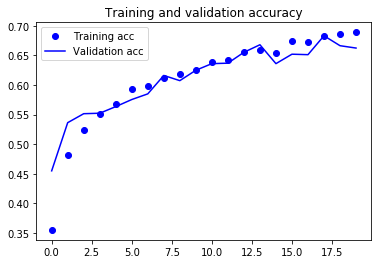

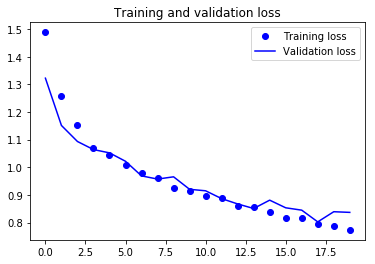

Training took a total of 0:15:24.109000


In [159]:
accuracy_charts()

### Test 2.2 Results
It seems like it is capping out around 68% accuracy at 20 epochs however when you compare it to the original Pre-Test at 20 epochs we are doing considerably better. Let's try a few more options for Test 2 and then go from there.

    - 1 Layer: loss: 0.8054 - acc: 0.6790 - val_loss: 0.8482 - val_acc: 0.6688
    - 2 Layers A: loss: 0.7732 - acc: 0.6891 - val_loss: 0.8367 - val_acc: 0.6624


## Test 2.3 Two layers Descending
We'll now reverse the two dense layers and see what that yields.

In [160]:
original_start = datetime.datetime.now()
start = datetime.datetime.now()

model = models.Sequential()

model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation = 'relu', input_shape=(16875,)))
model.add(layers.Dense(64, activation = 'relu'))

model.add(layers.Dense(5, activation='softmax'))

In [161]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Nadam(lr=1e-4),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch= (4999/batch_num),
      epochs=20,
      validation_data=test_generator,
      validation_steps= (1253/batch_num))

Epoch 1/20
500/499 [==============================] - 51s 102ms/step - loss: 1.4378 - acc: 0.3919 - val_loss: 1.2706 - val_acc: 0.4757acc: 0
Epoch 2/20
500/499 [==============================] - 45s 90ms/step - loss: 1.2057 - acc: 0.4971 - val_loss: 1.1152 - val_acc: 0.5291
Epoch 3/20
500/499 [==============================] - 49s 98ms/step - loss: 1.1173 - acc: 0.5426 - val_loss: 1.0796 - val_acc: 0.5626
Epoch 4/20
500/499 [==============================] - 52s 104ms/step - loss: 1.0558 - acc: 0.5709 - val_loss: 1.0181 - val_acc: 0.5986
Epoch 5/20
500/499 [==============================] - 52s 104ms/step - loss: 1.0176 - acc: 0.5891 - val_loss: 0.9849 - val_acc: 0.5778
Epoch 6/20
500/499 [==============================] - 53s 106ms/step - loss: 0.9866 - acc: 0.6059 - val_loss: 1.0015 - val_acc: 0.5738
Epoch 7/20
500/499 [==============================] - 53s 105ms/step - loss: 0.9607 - acc: 0.6085 - val_loss: 0.9662 - val_acc: 0.5922
Epoch 8/20
500/499 [==============================]

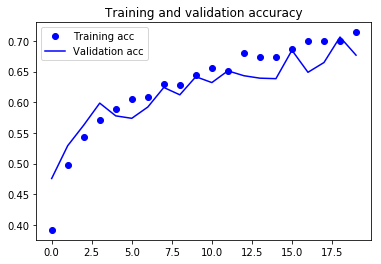

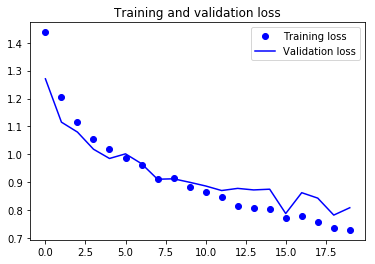

Training took a total of 0:17:01.984996


In [162]:
accuracy_charts()

### Test 2.3 Results
Having two layers with them descending seems to be better at smaller epochs than everything so far tested.

    - 2 Layers D: loss: 0.7286 - acc: 0.7142 - val_loss: 0.8082 - val_acc: 0.6768
    - 1 Layer: loss: 0.8054 - acc: 0.6790 - val_loss: 0.8482 - val_acc: 0.6688
    - 2 Layers A: loss: 0.7732 - acc: 0.6891 - val_loss: 0.8367 - val_acc: 0.6624
    
## Test 2.4 Conv Reversal
Since it seems more layers is helpful, let's see what happens when we have ascending convolutional layers and add another descending hidden layer.

In [165]:
original_start = datetime.datetime.now()
start = datetime.datetime.now()

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation = 'relu', input_shape=(16875,)))
model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dense(64, activation = 'relu'))

model.add(layers.Dense(5, activation='softmax'))

In [166]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Nadam(lr=1e-4),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch= (4999/batch_num),
      epochs=20,
      validation_data=test_generator,
      validation_steps= (1253/batch_num))

Epoch 1/20
500/499 [==============================] - 69s 138ms/step - loss: 1.4276 - acc: 0.3823 - val_loss: 1.2485 - val_acc: 0.4701
Epoch 2/20
500/499 [==============================] - 63s 125ms/step - loss: 1.2019 - acc: 0.5005 - val_loss: 1.0921 - val_acc: 0.5435
Epoch 3/20
500/499 [==============================] - 61s 123ms/step - loss: 1.0932 - acc: 0.5459 - val_loss: 1.0377 - val_acc: 0.5826
Epoch 4/20
500/499 [==============================] - 64s 127ms/step - loss: 1.0368 - acc: 0.5781 - val_loss: 0.9986 - val_acc: 0.5890
Epoch 5/20
500/499 [==============================] - 62s 124ms/step - loss: 0.9867 - acc: 0.6021 - val_loss: 0.9684 - val_acc: 0.5994
Epoch 6/20
500/499 [==============================] - 65s 130ms/step - loss: 0.9538 - acc: 0.6093 - val_loss: 0.9814 - val_acc: 0.5898
Epoch 7/20
500/499 [==============================] - 70s 140ms/step - loss: 0.9237 - acc: 0.6281 - val_loss: 0.9205 - val_acc: 0.6201
Epoch 8/20
500/499 [==============================] - 6

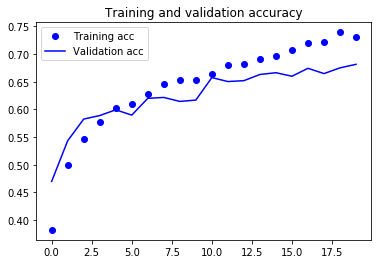

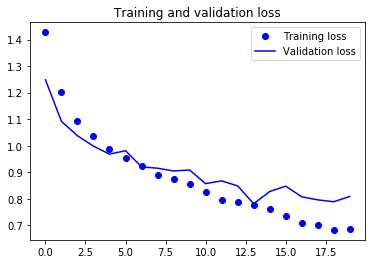

Training took a total of 0:21:18.362905


In [167]:
accuracy_charts()

### Test 2.4 Results
Another hidden layer seems to be adding a definite increase to the run time but the results seem to be so far the best we have achieved.

    - 2 Layers Conv R: loss: 0.6881 - acc: 0.7304 - val_loss: 0.8090 - val_acc: 0.6816
    - 2 Layers D: loss: 0.7286 - acc: 0.7142 - val_loss: 0.8082 - val_acc: 0.6768
    - 1 Layer: loss: 0.8054 - acc: 0.6790 - val_loss: 0.8482 - val_acc: 0.6688
    - 2 Layers A: loss: 0.7732 - acc: 0.6891 - val_loss: 0.8367 - val_acc: 0.6624

## Test 2.5 Another Convolutional Layer
Let's see if we add another convolutional layer of 128 and change nothing else to see what happens.

In [168]:
original_start = datetime.datetime.now()
start = datetime.datetime.now()

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation = 'relu', input_shape=(16875,)))
model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dense(64, activation = 'relu'))

model.add(layers.Dense(5, activation='softmax'))

In [169]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Nadam(lr=1e-4),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch= (4999/batch_num),
      epochs=20,
      validation_data=test_generator,
      validation_steps= (1253/batch_num))

Epoch 1/20
500/499 [==============================] - 51s 102ms/step - loss: 1.4716 - acc: 0.3665 - val_loss: 1.2814 - val_acc: 0.4621
Epoch 2/20
500/499 [==============================] - 50s 99ms/step - loss: 1.2329 - acc: 0.4866 - val_loss: 1.1040 - val_acc: 0.5587
Epoch 3/20
500/499 [==============================] - 51s 103ms/step - loss: 1.1125 - acc: 0.5320 - val_loss: 1.0779 - val_acc: 0.5347
Epoch 4/20
500/499 [==============================] - 52s 103ms/step - loss: 1.0523 - acc: 0.5663 - val_loss: 0.9850 - val_acc: 0.5706
Epoch 5/20
500/499 [==============================] - 52s 105ms/step - loss: 1.0142 - acc: 0.5863 - val_loss: 1.0812 - val_acc: 0.5411
Epoch 6/20
500/499 [==============================] - 55s 110ms/step - loss: 0.9720 - acc: 0.5958 - val_loss: 0.9370 - val_acc: 0.6081
Epoch 7/20
500/499 [==============================] - 52s 103ms/step - loss: 0.9361 - acc: 0.6083 - val_loss: 0.9292 - val_acc: 0.6201
Epoch 8/20
500/499 [==============================] - 47

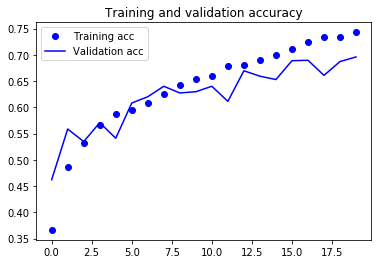

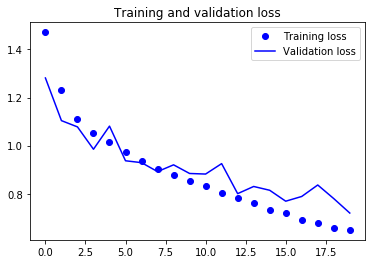

Training took a total of 0:16:10.102215


In [170]:
accuracy_charts()

### Test 2.5 Results
It took more time and yields mixed results compared to a 2 layer model in that the loss is down but so is the accuracy. 

    - 3 Layers Conv R: loss: 0.6495 - acc: 0.7429 - val_loss: 0.7196 - val_acc: 0.6959
    - 2 Layers Conv R: loss: 0.6881 - acc: 0.7304 - val_loss: 0.8090 - val_acc: 0.6816
    - 2 Layers D: loss: 0.7286 - acc: 0.7142 - val_loss: 0.8082 - val_acc: 0.6768
    - 1 Layer: loss: 0.8054 - acc: 0.6790 - val_loss: 0.8482 - val_acc: 0.6688
    - 2 Layers A: loss: 0.7732 - acc: 0.6891 - val_loss: 0.8367 - val_acc: 0.6624

## Test 2 Results
We'll run with 3 convolutional layers and 3 hidden layers for the next set of tests.


# Test 3 Regularization (Abridged)
So now that we plan to have more Conv2d layers and more Dense layers we should test out a few options that could do better overall before we add more epochs. We should test L1 regularization and L2 regularization. 

# Results (Models cut)
Unfortunately the regularization only added serious loss to our model and gave no considerable benefits with Kernal regularization. However due to the usage of it I wanted to make a note that they were attempted and did not yield well before moving onto the final test.

# Final Test
Now that we have everything else cleaned up let's have a model run to 50 epochs with all of the established changes that we found so far.

Changelist:
    
    - 3 Convolutional layers
    - 3 Hidden layers
    - No L1 or L2 regularization
    - Nadam optimized
    - No Dropout
    - 50 Epochs

In [176]:
original_start = datetime.datetime.now()
start = datetime.datetime.now()

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation = 'relu', input_shape=(16875,)))
model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dense(64, activation = 'relu'))

model.add(layers.Dense(5, activation='softmax'))

In [177]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Nadam(lr=1e-4),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch= (4999/batch_num),
      epochs=50,
      validation_data=test_generator,
      validation_steps= (1253/batch_num))

Epoch 1/50
500/499 [==============================] - 40s 80ms/step - loss: 1.4590 - acc: 0.3745 - val_loss: 1.3203 - val_acc: 0.4126
Epoch 2/50
500/499 [==============================] - 42s 85ms/step - loss: 1.2153 - acc: 0.4921 - val_loss: 1.1203 - val_acc: 0.5515
Epoch 3/50
500/499 [==============================] - 44s 88ms/step - loss: 1.0881 - acc: 0.5435 - val_loss: 1.0346 - val_acc: 0.5515
Epoch 4/50
500/499 [==============================] - 44s 88ms/step - loss: 1.0266 - acc: 0.5776 - val_loss: 0.9517 - val_acc: 0.6105
Epoch 5/50
500/499 [==============================] - 45s 91ms/step - loss: 0.9536 - acc: 0.6027 - val_loss: 0.9435 - val_acc: 0.6145
Epoch 6/50
500/499 [==============================] - 49s 97ms/step - loss: 0.9262 - acc: 0.6193 - val_loss: 0.8781 - val_acc: 0.6345
Epoch 7/50
500/499 [==============================] - 50s 100ms/step - loss: 0.8743 - acc: 0.6393 - val_loss: 0.8781 - val_acc: 0.6512
Epoch 8/50
500/499 [==============================] - 50s 100

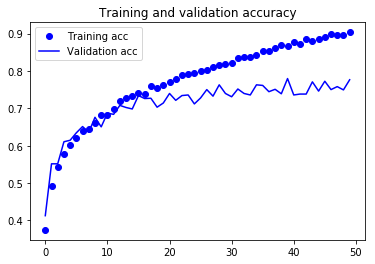

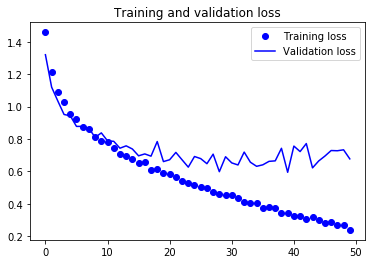

Training took a total of 0:39:46.990641


In [178]:
accuracy_charts()

# Conclusion
Based on everything that we have tested throughout this project I have completed the model that I would present and use recommendations with and it ended with an okay 85 percent accuracy and 75 validation accuracy.

# Recomendations 
For the hypothetical Shipyard census department that I would be making this for I would present them the results as is with the recomendations of what to do with it:

    1) While the percent accuracy is not closer to 95% we do have a solid recognition for a base model.
        - We should take this and compare it to census data of ships coming to the shipyard.
    2) We need to be careful with ship angles that we photograph, sides or angled sides of ships work significantly better for testing.
    3) We have grey and color photos as well as different sized photos. We should standardize our information better.


# Potential Future Recomendations
While the project did yield solid results there are ways that we could have perfected the project even more.

    1) More data augmentation.
        - We did some of it but we didn't want to go overboard on it.
    2) More testing with layers, optimizers, and regularization
        - There could always be more of this.
    3) Using PyTorch
        - Throughout my search for solutions to my project I found that many people either used Keras or PyTorch. If I could do it again I would try the other option and see how that would have worked.
    4) Changing to Greyscale
        - Many keras models I found that felt that color wasn't necesary omitted it altogether. While it would have affected how accurate the data was and alter some of data augmentation it would have significantly cut down the run times of our models and allowed for robust models through other means.
    5) Using a different Learning Rate.
        - I kept the LR very low but there were arguments to have it be slightly higher than 0.0001.
    6) Using Xception
        - I stumbled across someone who used the same dataset as me who did a far better job with the final test and they used Xception to assist with their model generation.
    7) Different image and batch size
        - Playing with these two variables more could have yielded stronger data but the sheer number of tests that I would have needed to run to test them deterred me from it for this project.